In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Task 1: Data Cleaning & Preparation

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv('python_practise/Cardiotocographic.csv')
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [14]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [16]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [17]:
data_clean = data.copy()
for col in data_clean.columns:
    data_clean[col].fillna(data_clean[col].median(), inplace=True)

In [19]:
print(data_clean.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [20]:
outliers = {}
for col in data_clean.select_dtypes(include='number').columns:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((data_clean[col] < lower_bound) | (data_clean[col] > upper_bound)).sum()
    outliers[col] = outlier_count

In [24]:
print(outliers)

{'LB': np.int64(10), 'AC': np.int64(43), 'FM': np.int64(347), 'UC': np.int64(13), 'DL': np.int64(125), 'DS': np.int64(120), 'DP': np.int64(284), 'ASTV': np.int64(10), 'MSTV': np.int64(80), 'ALTV': np.int64(318), 'MLTV': np.int64(81), 'Width': np.int64(10), 'Tendency': np.int64(10), 'NSP': np.int64(559)}


## Task 2: Statistical Summary

In [26]:
print("\nStatistical Summary:")
summary = data_clean.describe().T
summary["median"] = data_clean.median()
summary["IQR"] = summary["75%"] - summary["25%"]
print(summary)


Statistical Summary:
           count        mean        std         min         25%         50%  \
LB        2126.0  133.340204  11.214379   51.842487  126.000000  133.000000   
AC        2126.0    0.003204   0.004373   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2126.0    0.000002   0.000141   -0.001353    0.000000    0.000000   
DP        2126.0    0.000173   0.000836   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2126.0    8.276147   7.734851  -50.700000    4.600000    7.400000   
Width     2126.0   70.395387  

## Task 3: Data Visualization

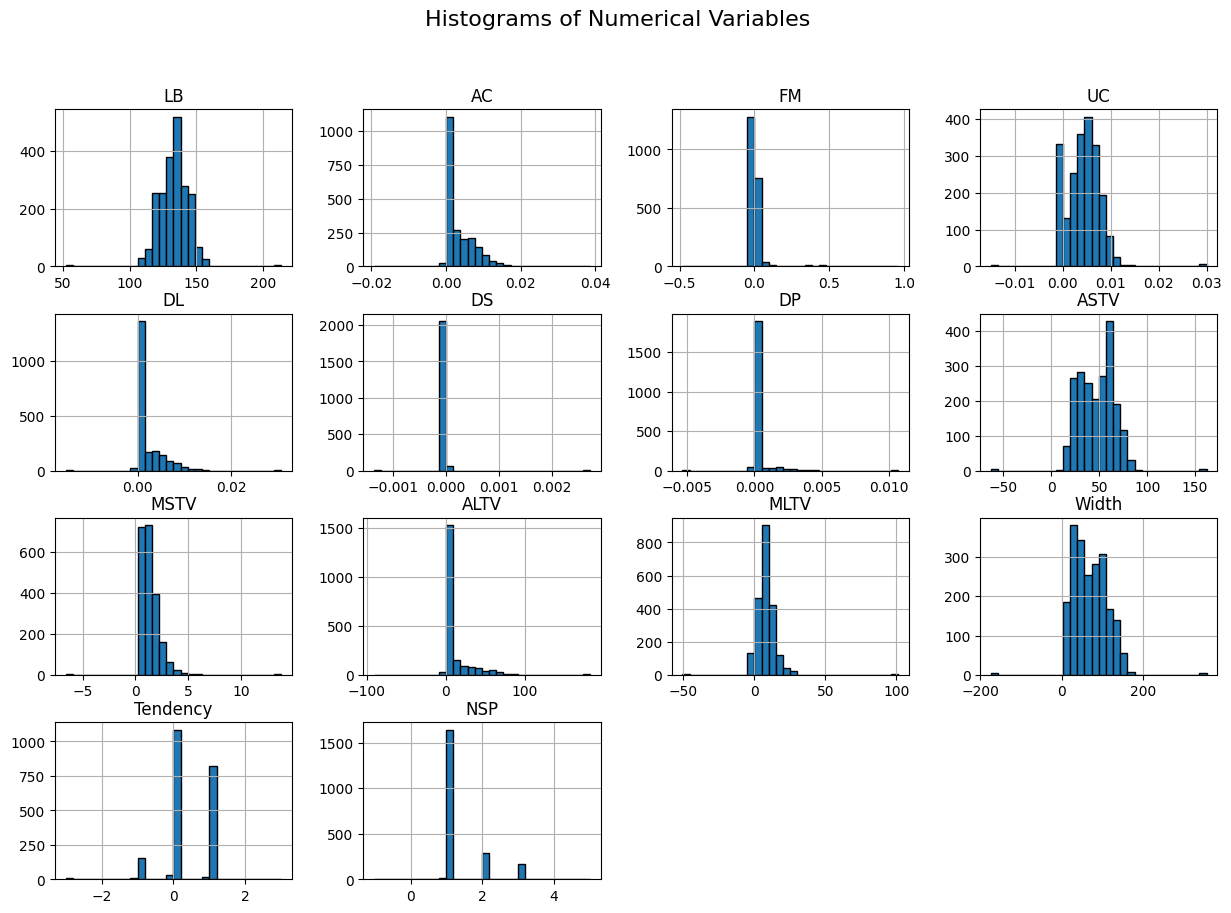

In [27]:
data_clean.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

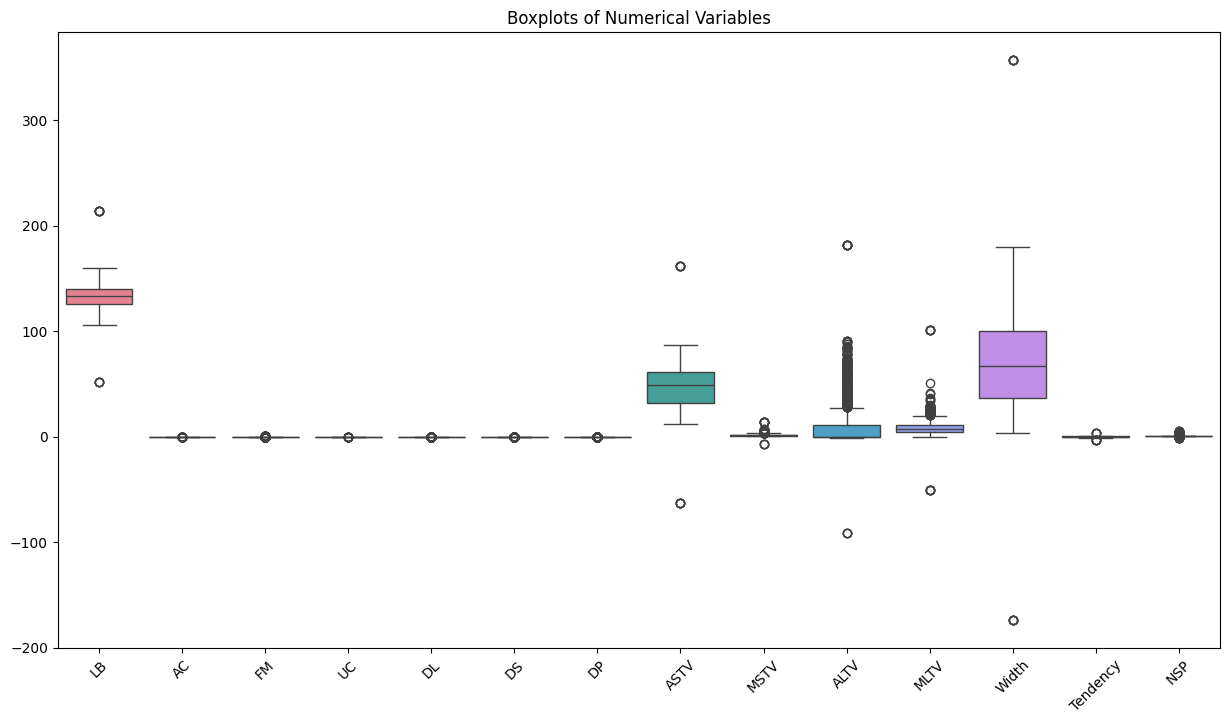

In [45]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Variables")
plt.show()

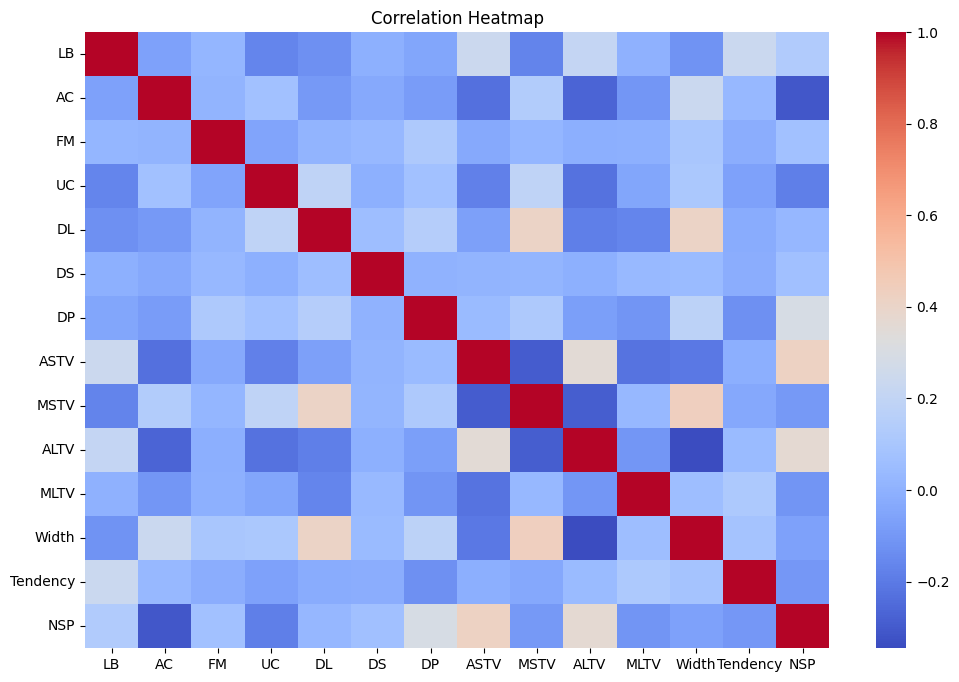

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_clean.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

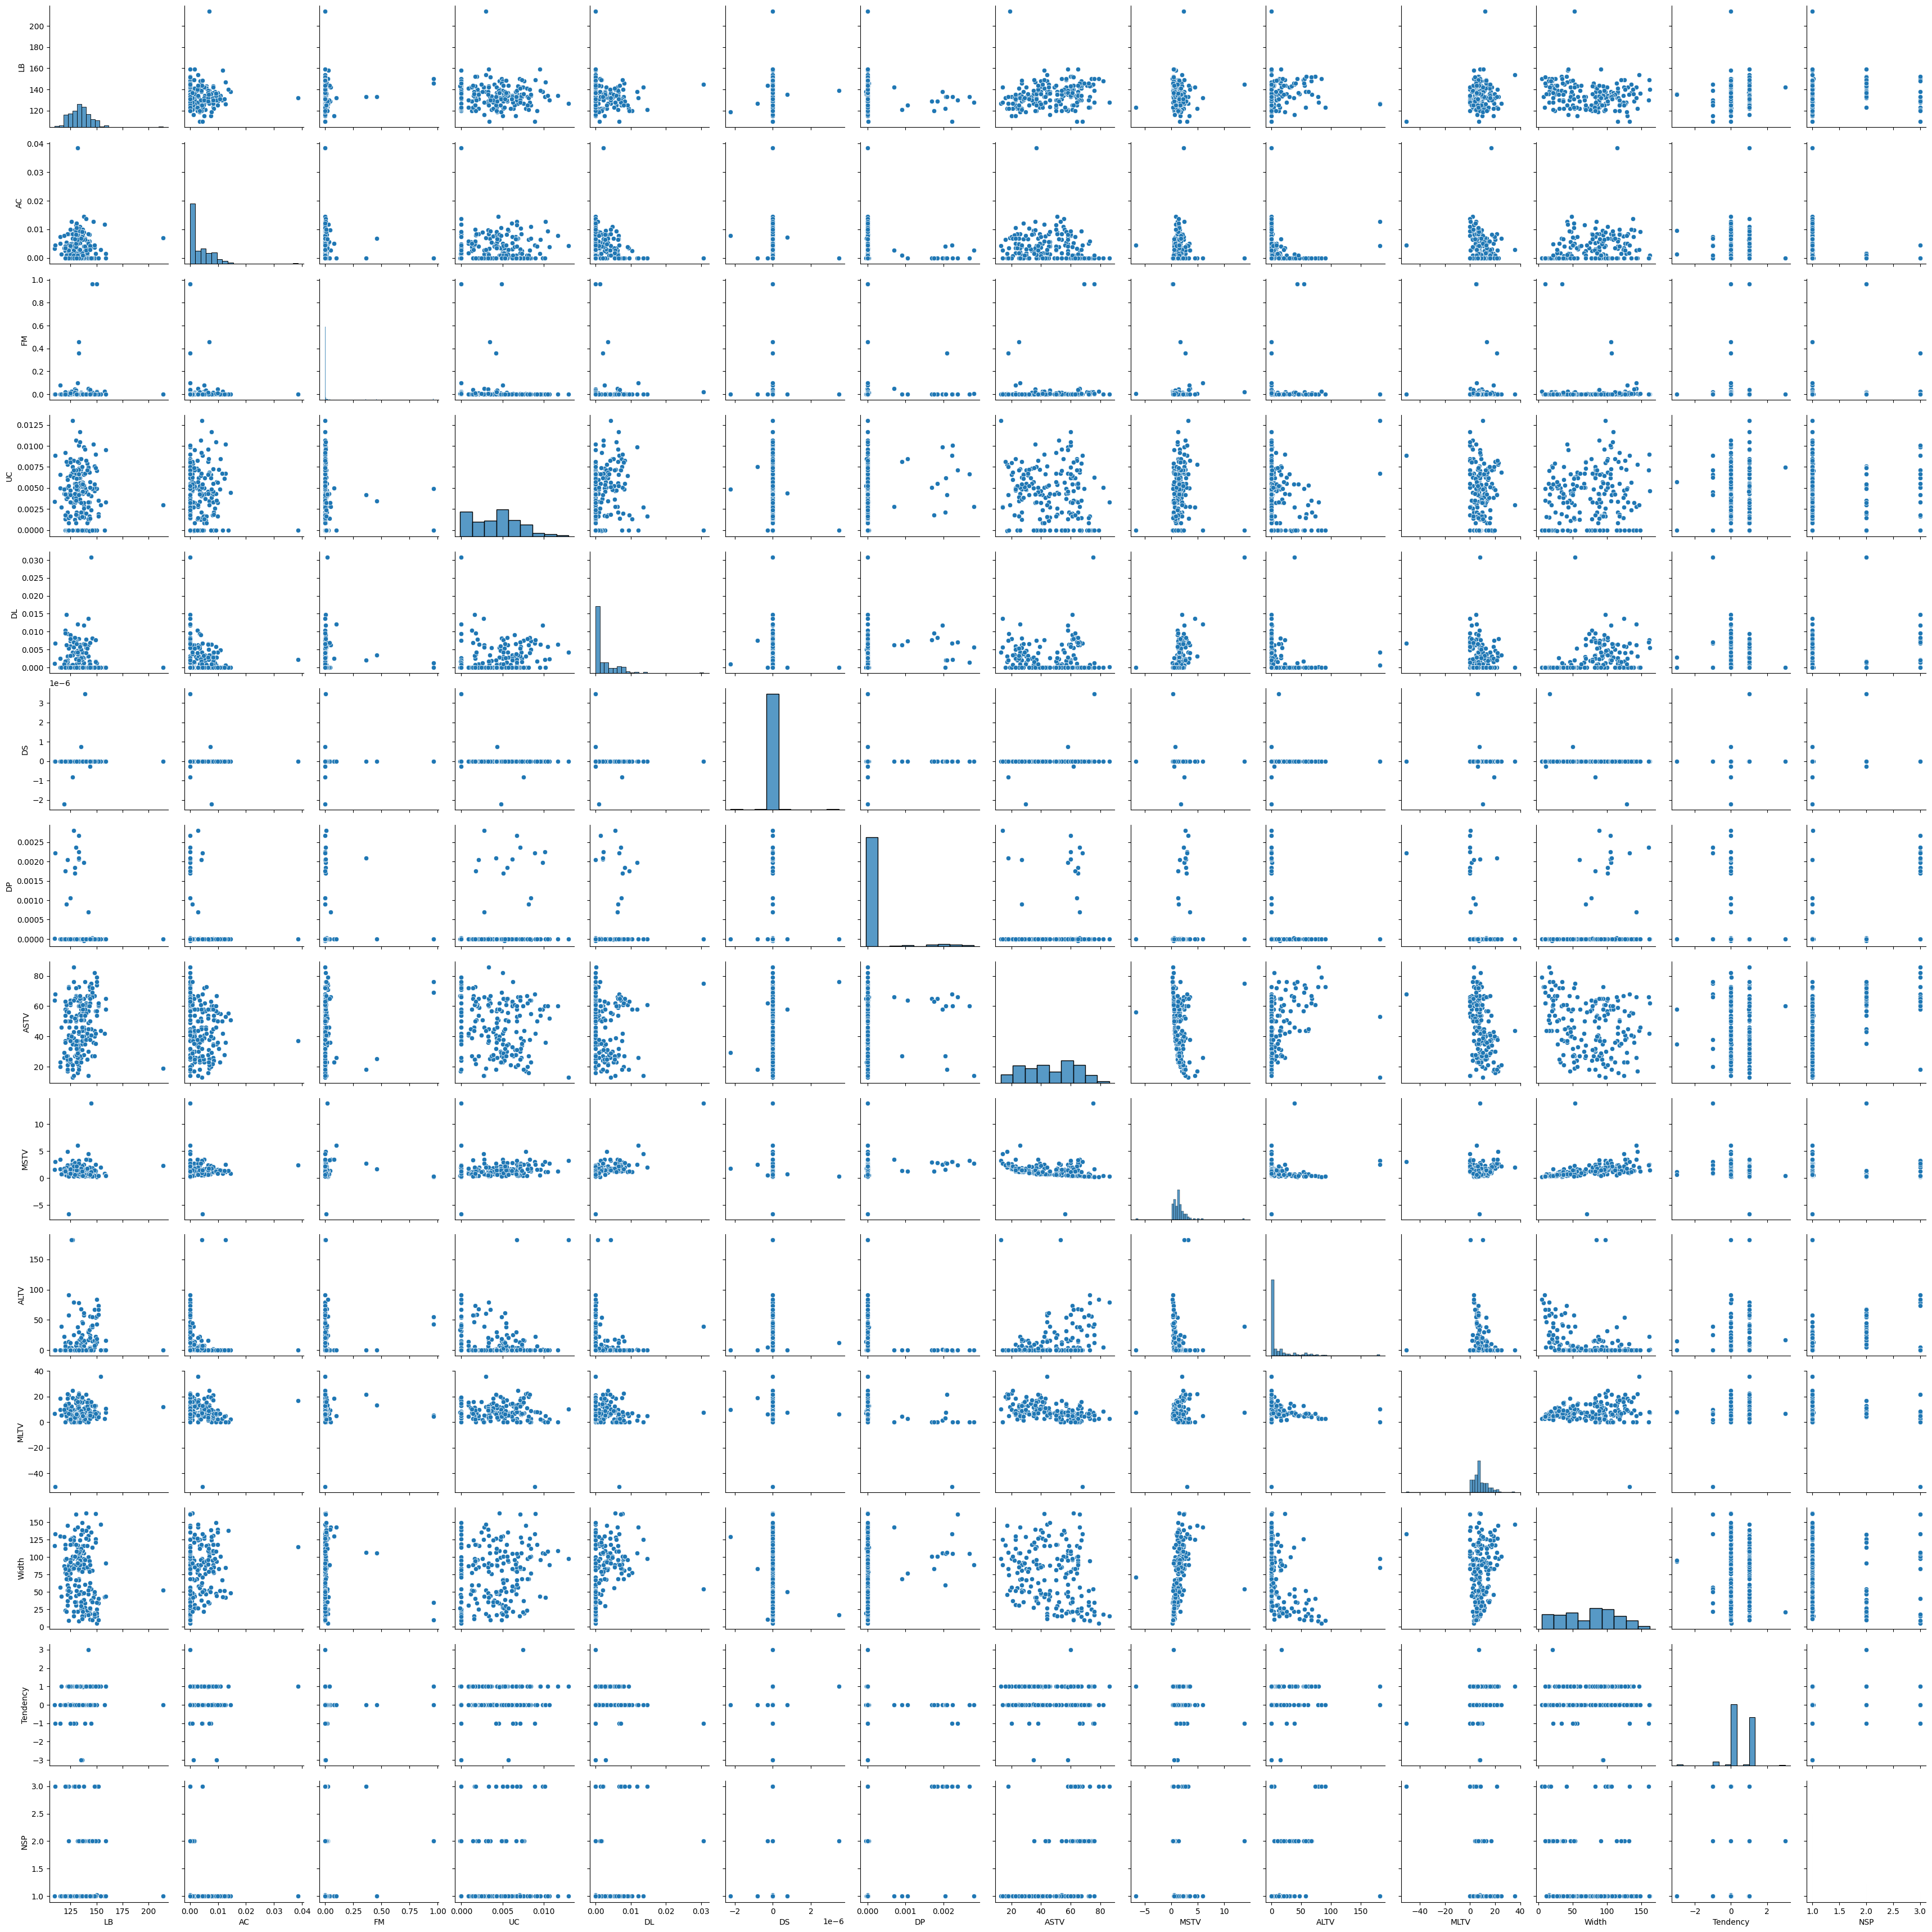

In [37]:
sns.pairplot(data_clean.sample(200)) 
plt.show()

## Task 4: Pattern Recognition and Insights

In [46]:
corr_matrix = data_clean.corr()
strong_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]
print("\nStrong correlations (>0.7):")
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))


Strong correlations (>0.7):
Empty DataFrame
Columns: []
Index: []


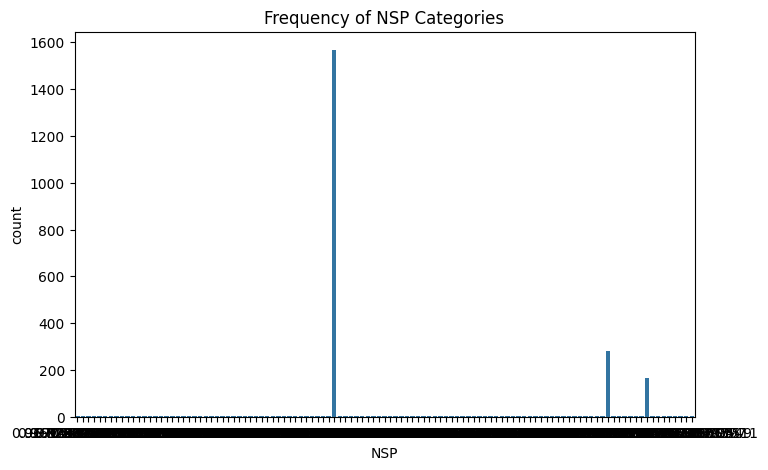

In [48]:
if "NSP" in data_clean.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="NSP", data=data_clean)
    plt.title("Frequency of NSP Categories")
    plt.show()

## Task 5: Conclusion

In [49]:
print("\nKey Insights:")
print("- Missing values were small in number and filled using median values.")
print("- Several variables contain significant outliers, especially FM, DP, ALTV, and NSP.")
print("- Strong correlations found between some variables.")
print("- Data distributions vary widely; some are highly skewed.")


Key Insights:
- Missing values were small in number and filled using median values.
- Several variables contain significant outliers, especially FM, DP, ALTV, and NSP.
- Strong correlations found between some variables.
- Data distributions vary widely; some are highly skewed.


# THANK YOU